In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits/fruits-360_dataset/fruits-360/LICENSE
/kaggle/input/fruits/fruits-360_dataset/fruits-360/readme.md
/kaggle/input/fruits/fruits-360_dataset/fruits-360/papers/fruit_recognition_deep_learning.pdf
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_305_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/139_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/128_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_239_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/185_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_199_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_287_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/73_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/191_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

['fruits']
fruits



In [84]:
np.random.seed(1234)
directory="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training"
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [85]:
directory2="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

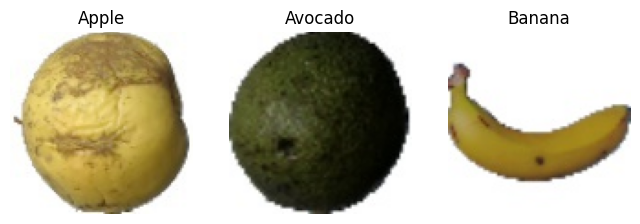

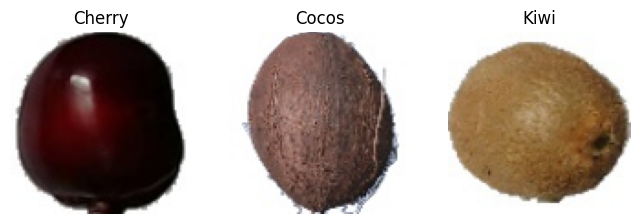

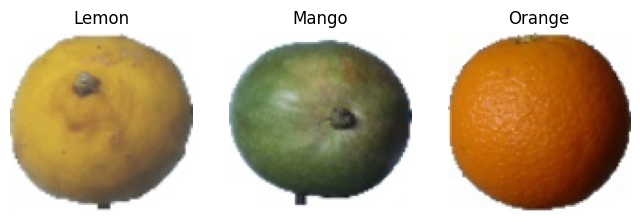

In [86]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3


In [87]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [88]:
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


In [89]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [90]:
Y_train.shape

(4306, 9)

In [91]:
X_train.shape

(4306, 100, 100, 3)

In [92]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [93]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=200
batch_size=32

In [94]:
# Your existing code for data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.5,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=False,
    vertical_flip=False,
)

datagen.fit(x_train)

# Import the EarlyStopping callback
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model fitting with EarlyStopping callback
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=x_train.shape[0] // batch_size,
    callbacks=[early_stopping]  # Add EarlyStopping callback
)


Epoch 1/200


2023-12-27 20:06:09.401006: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


107/107 [==============================] - 11s 86ms/step - loss: 2.1151 - accuracy: 0.1864 - val_loss: 1.4625 - val_accuracy: 0.3852
Epoch 2/200
107/107 [==============================] - 9s 84ms/step - loss: 0.9772 - accuracy: 0.5780 - val_loss: 0.7856 - val_accuracy: 0.7019
Epoch 3/200
107/107 [==============================] - 9s 83ms/step - loss: 0.5061 - accuracy: 0.7802 - val_loss: 0.3276 - val_accuracy: 0.9014
Epoch 4/200
107/107 [==============================] - 9s 83ms/step - loss: 0.3412 - accuracy: 0.8766 - val_loss: 0.2031 - val_accuracy: 0.9246
Epoch 5/200
107/107 [==============================] - 9s 84ms/step - loss: 0.2366 - accuracy: 0.9135 - val_loss: 0.2120 - val_accuracy: 0.9362
Epoch 6/200
107/107 [==============================] - 9s 83ms/step - loss: 0.1876 - accuracy: 0.9264 - val_loss: 0.0665 - val_accuracy: 0.9896
Epoch 7/200
107/107 [==============================] - 9s 83ms/step - loss: 0.1326 - accuracy: 0.9578 - val_loss: 0.0452 - val_accuracy: 0.9896
Epo

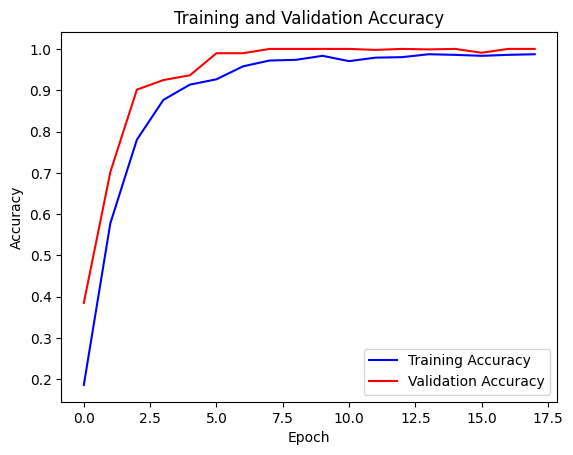

In [95]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")

# Set labels and title
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Display the legend
plt.legend()

# Show the plot
plt.show()

27/27 [==============================] - 0s 3ms/step


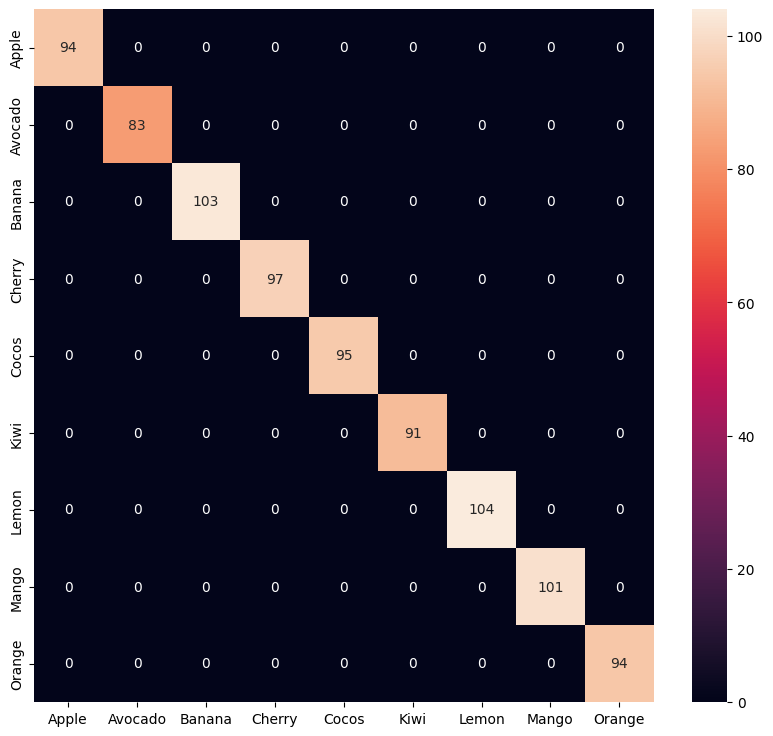

In [96]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

46/46 [==============================] - 0s 3ms/step


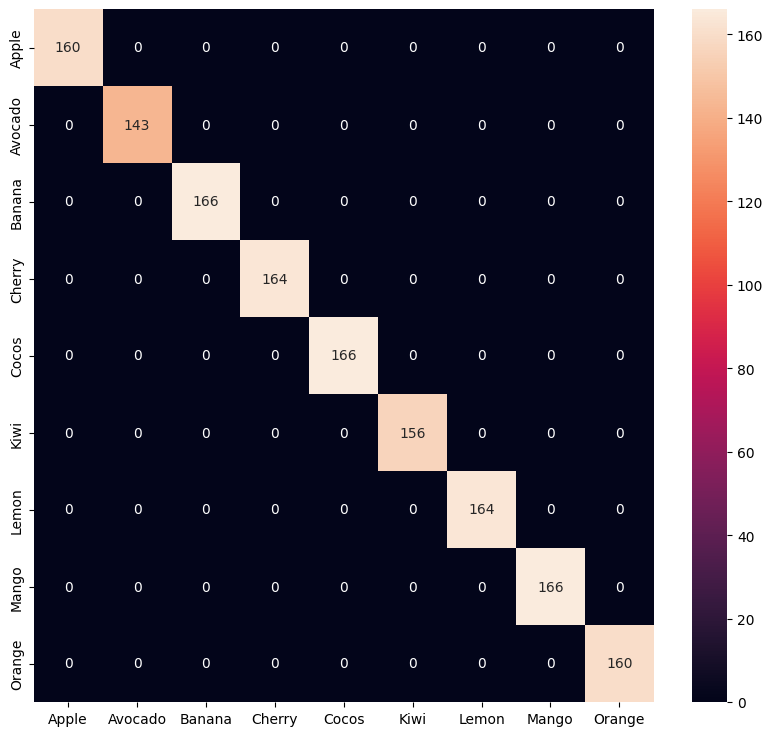

In [97]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

In [98]:
# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}")

46/46 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Loss: [0.004194219596683979, 1.0]


In [104]:
TN = conf_mat[0, 0]  # True Negatives
FP = conf_mat[0, 1]  # False Positives
FN = conf_mat[1, 0]  # False Negatives
TP = conf_mat[1, 1]  # True Positives

# Calculate Recall
recall = TP / (TP + FN)
print("Recall:", recall)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Calculate Precision
precision = TP / (TP + FP)
print("Precision:", precision)


Recall: 1.0
Accuracy: 1.0
Precision: 1.0
